# **Anomaly Detection in trajectory data-SH**

## **About anomaly detection**
Anomaly detection is generally understood to be the identification of rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well-defined notion of normal behavior.

## **1. Download Ushant Dataset**

This dataset corresponds to 6 months of AIS data of vessels steaming in the area of the Ushant traffic separation scheme (in Brittany, West of France). This is an area with one of the highest traffic density in the world, with a clear separation scheme with two navigation lanes. Different kinds of vessels are present in the area, from cargos and tankers with high velocity and straight routes to sailing boats or fishing vessels with low speed and different sailing directions. As such, the area is highly monitored to avoid collision or grounding, and a better analysis and understanding of the different ship behaviors is of prime importance.

The whole trajectory data set consists in 18,603 trajectories, gathering overall more than 7 millions GPS observations. Only trajectories having more than 30 points were kept, time lag between two consecutive observations ranges between 5 seconds and 15 hours, with 95% of time lags below 3 minutes.

In [ ]:
import os
import urllib.request
import zipfile
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [ ]:
folder_path = 'ushant_ais'
filename = 'ushant_ais.zip'
url = 'https://figshare.com/ndownloader/files/16442771'

In [ ]:
# Download the zip file
urllib.request.urlretrieve(url, filename)

# Extract the zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(folder_path)

# Delete the zip file
os.remove(filename)

### **Read data**

This directory contains data presented in the article “Scalable clustering of {segmented} trajectories within a continuous time framework: application to maritime traffic data” by Gloaguen et al.


The data directory contains 18603 files, each of them being a trajectory.

In [ ]:
data_folder = 'ushant_ais/data'
file_names = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.txt')]

len(file_names)

18603

In [ ]:
# List to store the data from all files
data = []

# Loop through each file
for file_name in tqdm(file_names):
    # Read the file into a pandas DataFrame
    df = pd.read_csv(file_name, delimiter=';')
    
    # Append the DataFrame to the list
    data.append(df)

del file_names

100%|██████████| 18603/18603 [00:57<00:00, 322.48it/s]


In [ ]:
len(data)

18603

Each file has the following structure (with a varying number of rows):

In [ ]:
data[0].head(5)

,x,y,vx,vy,t
0,-4.312973,49.491357,-13.167128,-8.550833,0
1,-4.445023,49.439328,-12.831660,-8.332977,1404
2,-4.498913,49.417995,-12.580059,-8.169586,1990
3,-4.551767,49.397028,-12.466307,-7.789813,2577
4,-4.563358,49.392438,-12.160723,-7.897266,2708


* `x` is the longitude 

* `y` is the latitude 

* `vx` is the x-velocity 

* `vy` is the y-velocity 

* `t` the time since the beginning of the trajectory (in seconds)

show first Trajectory

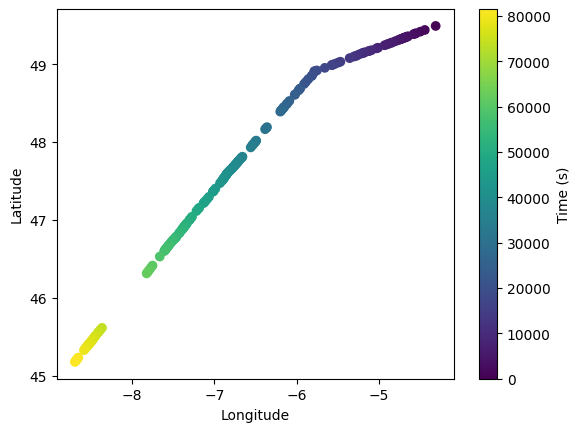

In [ ]:
# Convert 't' column to numeric
data[0]['t'] = pd.to_numeric(data[0]['t'], errors='coerce')

# Create a scatter plot
plt.scatter(x=data[0]['x'], y=data[0]['y'], c=data[0]['t'], cmap='viridis')

# Set the labels for x-axis, y-axis, and colorbar
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Time (s)')

# Show the plot
plt.show()

### plot each trajectory as a single line

In [ ]:
# Create a dropdown widget for trajectory selection
trajectory_dropdown = widgets.Dropdown(
    options=list(range(len(data))),
    description='Trajectory:'
)

# Define a function to update the plot based on the selected trajectory
def update_plot(trajectory_index):
    plt.figure()
    trajectory = data[trajectory_index]  # Access the trajectory using integer index
    plt.plot(trajectory['x'], trajectory['y'])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Trajectory')
    plt.show()

# Set up the interaction between the dropdown and plot
widgets.interact(update_plot, trajectory_index=trajectory_dropdown)

# Display the dropdown widget
display(trajectory_dropdown)


interactive(children=(Dropdown(description='Trajectory:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

Dropdown(description='Trajectory:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…

### Plot all trajectory toghether

Plotting trajectories: 100%|██████████| 18603/18603 [00:16<00:00, 1121.97it/s]


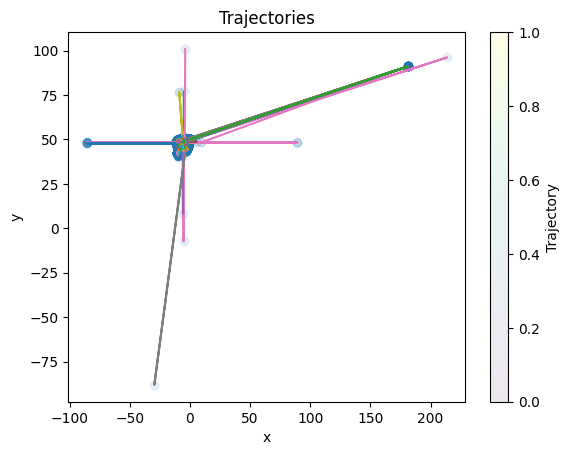

In [ ]:
x_coords = []
y_coords = []

# Iterate over each trajectory and append the x and y coordinates
for trajectory in data:
    x_coords.extend(trajectory['x'])
    y_coords.extend(trajectory['y'])

# Create a scatter plot with all coordinates
plt.scatter(x_coords, y_coords, alpha=0.1)

# Plot each trajectory separately
for trajectory in tqdm(data, desc="Plotting trajectories"):
    plt.plot(trajectory['x'], trajectory['y'])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories')
plt.colorbar(label='Trajectory')
plt.show()

### plot the velocities

100%|██████████| 18603/18603 [00:19<00:00, 968.17it/s] 


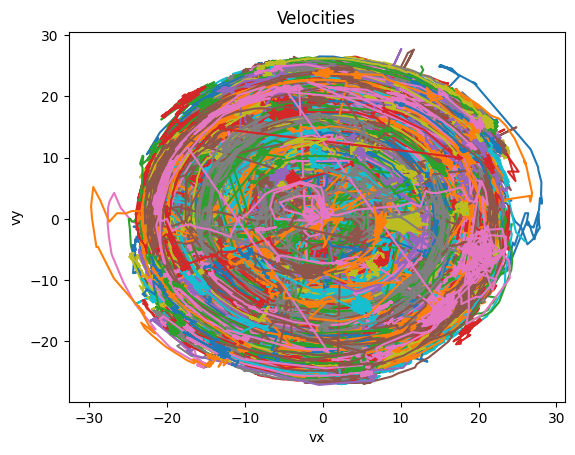

In [ ]:
for velocity in tqdm(data):
    plt.plot(velocity['vx'], velocity['vy'])
    
plt.xlabel('vx')
plt.ylabel('vy')
plt.title('Velocities')
plt.show()